In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
data=pd.read_csv('cell_samples.csv')

In [3]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#row=record
#column=attribute/dimension
#target=prediction

In [5]:
#Distribution of the classes

data.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
data.count()
data.size
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

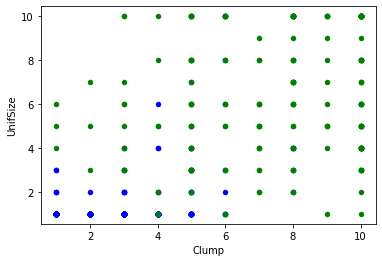

In [8]:
# Distribution of the classes
benign_df=data[data['Class']==2][0:200]
malginant_df=data[data['Class']==4][0:200]
axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue')

malginant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='green',ax=axes)
#help(benign_df.plot)

In [9]:
# deleting unwanted rows
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype('int')

In [11]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [13]:
feature_df=data[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']]
X=np.asarray(feature_df)
Y=np.asarray(data['Class'])
X[0:5]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1,       2],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1,       2],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1,       2],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1,       2],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1,       2]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
X_train.shape
y_train.shape

(546,)

In [15]:
from sklearn import svm 

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [16]:
y_predict=classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pr))

NameError: name 'y_pr' is not defined